In [1]:

# A1 - Neural Networks and Regression (Testing Implementations)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Import your three implementations
from NeuralNet import NeuralNet                   # BP-M (from scratch)
from neuralnet_torch import NeuralNetTorch        # BP-F (PyTorch)
from mlr_sklearn import MultipleLinearRegressionSK  # MLR-F (scikit-learn)

In [ ]:
#Dataset Base

# XOR dataset (non-linear) for BP
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
Z_xor = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Linear dataset - for Regression
X_lin = np.array([
    [1.0, 2.0],
    [2.0, 0.0],
    [3.0, 1.0],
    [4.0, 3.0],
    [5.0, 5.0],
], dtype=np.float64)

Z_lin = 2 * X_lin[:, 0] + 0.5 * X_lin[:, 1] + 1.0


In [7]:
# Load dataset from file 
hours = pd.read_csv('hours_encoded.csv')

# Remove cnt column, as we'll be using cnt_log for regression
hours = hours.drop(columns=["cnt"])

# Shuffle data as per instructions, and pick up only first 1500 samples
hours = hours.sample(n=1500, random_state=42).reset_index(drop=True)

X = hours.drop(columns=["cnt_log"])
y = hours["cnt_log"]

# split train / val / test as per instructions
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size=0.20,      # 20% for test
    shuffle=True,        # not stricly necessary
    random_state=42
)

# Split trainval into train and val 
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=0.2,     
    shuffle=True,
    random_state=42
)

# (Optional) Check sizes
print("X_train:", X_train.shape)
print("X_val:  ", X_val.shape)
print("X_test: ", X_test.shape)
# test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_xor = X_train_scaled
Z_xor = y_train.values

X_train: (960, 61)
X_val:   (240, 61)
X_test:  (300, 61)


Neural network has been initialized
Architecture (neurons per layer): [61, 35, 1]
Activation function used: sigmoid
 Layer 1: w(35, 61), theta(35, 1)
 Layer 2: w(1, 35), theta(1, 1)
Epoch 0: Train MSE=7.177271
Epoch 100: Train MSE=7.155404
Epoch 200: Train MSE=7.155398

Predictions BP-M (from scratch):


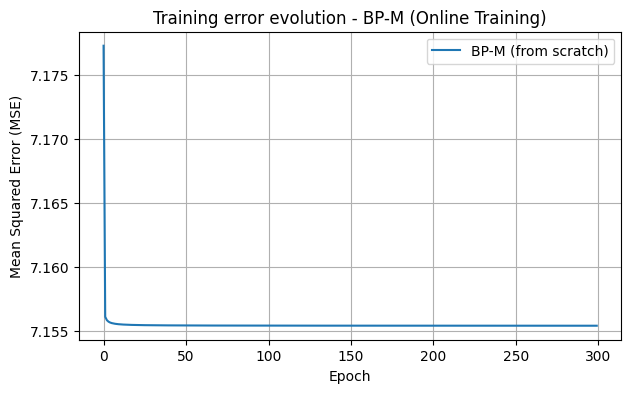

In [8]:

# Test 1: Neural Network - BP (from scratch)

# Create the manual neural network using the same parameters as in the assignment
net_manual = NeuralNet(
    [61, 35, 1],
    fact='sigmoid',
    eta=0.01,
    alpha=0.9,
    epochs=300,
    val_split=0.0
)

# Training phase (each pattern is processed individually - online mode)
net_manual.fit(X_xor, Z_xor)

# Retrieve training errors per epoch
train_err_manual, _ = net_manual.loss_epochs()


# Predictions

# Evaluate one sample at a time (online mode)
pred_manual = np.array([net_manual.predict(x) for x in X_xor])

print("\nPredictions BP-M (from scratch):")
#for i, (inp, pred) in enumerate(zip(X_xor, pred_manual)):
#    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_manual, label="BP-M (from scratch)", color="tab:blue")
plt.title("Training error evolution - BP-M (Online Training)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

Neural network (PyTorch) has been initialized
Architecture (neurons per layer): [61, 35, 1]
Activation function used: sigmoid
Epoch 0: Train MSE=20.447817
Epoch 100: Train MSE=1.976909
Epoch 200: Train MSE=1.976513
Epoch 300: Train MSE=1.976442
Epoch 400: Train MSE=1.976419


/Volumes/SST2/Dev/gh/nec-activity1/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([960])) that is different to the input size (torch.Size([960, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 500: Train MSE=1.976409
Epoch 600: Train MSE=1.976404
Epoch 700: Train MSE=1.976400
Epoch 800: Train MSE=1.976398
Epoch 900: Train MSE=1.976396

Predictions BP-F (PyTorch):


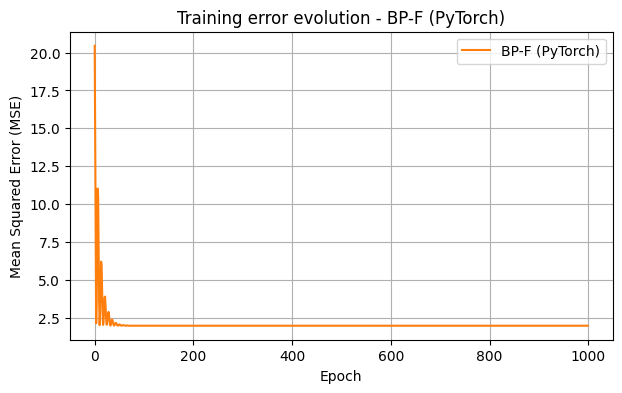

In [9]:

# Test 2: Neural Network - BP (PyTorch)


# Create the PyTorch neural network (same architecture and parameters)
net_torch = NeuralNetTorch(
    [61, 35, 1],
    fact='sigmoid',
    eta=0.01,
    alpha=0.9,
    epochs=1000,
    val_split=0.0
)

# Train the network
net_torch.fit(X_xor, Z_xor)

# Retrieve training errors
train_err_torch, _ = net_torch.loss_epochs()


# Predictions

pred_torch = net_torch.predict(X_xor)

print("\nPredictions BP-F (PyTorch):")
#for i, (inp, pred) in enumerate(zip(X_xor, pred_torch)):
#    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training error evolution - BP-F (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

MLR (scikit-learn) fitted
 - Train MSE: 0.191914 | Train R^2: 0.903728
 -  Val  MSE: 0.298498 |  Val  R^2: 0.842514

Predictions MLR-F (scikit-learn):
Sample 0: Predicted cnt_log = 3.8549, Real cnt_log = 3.4340
Sample 1: Predicted cnt_log = 4.9574, Real cnt_log = 5.0876
Sample 2: Predicted cnt_log = 4.7697, Real cnt_log = 5.1240
Sample 3: Predicted cnt_log = 5.2891, Real cnt_log = 5.4681
Sample 4: Predicted cnt_log = 2.9960, Real cnt_log = 2.1972
Sample 5: Predicted cnt_log = 2.5532, Real cnt_log = 3.2189
Sample 6: Predicted cnt_log = 5.1562, Real cnt_log = 5.2417
Sample 7: Predicted cnt_log = 3.2225, Real cnt_log = 2.3979
Sample 8: Predicted cnt_log = 4.4367, Real cnt_log = 5.1299
Sample 9: Predicted cnt_log = 5.3021, Real cnt_log = 5.4931
Sample 10: Predicted cnt_log = 5.8112, Real cnt_log = 5.6664
Sample 11: Predicted cnt_log = 4.1148, Real cnt_log = 4.0943
Sample 12: Predicted cnt_log = 4.5236, Real cnt_log = 4.8978
Sample 13: Predicted cnt_log = 4.6409, Real cnt_log = 4.3694
Sampl

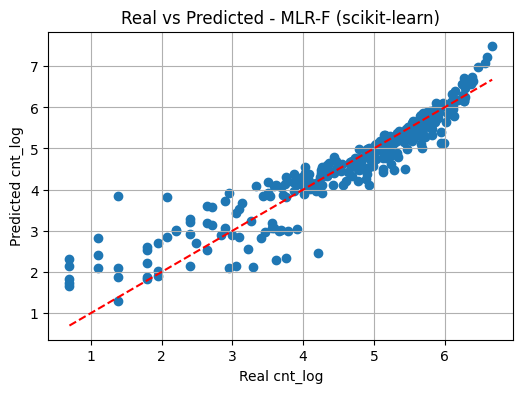

In [10]:

# Test 3: Multiple Linear Regression - MLR (scikit-learn)

# Create the regression model with 20% validation
mlr = MultipleLinearRegressionSK(val_split=0.2, scale=False)

# Train the model
mlr.fit(X_train.values, y_train.values)

# Predictions
y_pred = mlr.predict(X_test.values) 

print("\nPredictions MLR-F (scikit-learn):")
for i, (inp, pred, real) in enumerate(zip(X_test.values, y_pred, y_test.values)):
    print(f"Sample {i}: Predicted cnt_log = {pred:.4f}, Real cnt_log = {real:.4f}")

# Print learned coefficients
print("\nLearned coefficients:")
print("Coef:", mlr.coef_)
print("Intercept:", mlr.intercept_)

# Plot real vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")
plt.title("Real vs Predicted - MLR-F (scikit-learn)")
plt.xlabel("Real cnt_log")
plt.ylabel("Predicted cnt_log")
plt.grid(True)
plt.show()

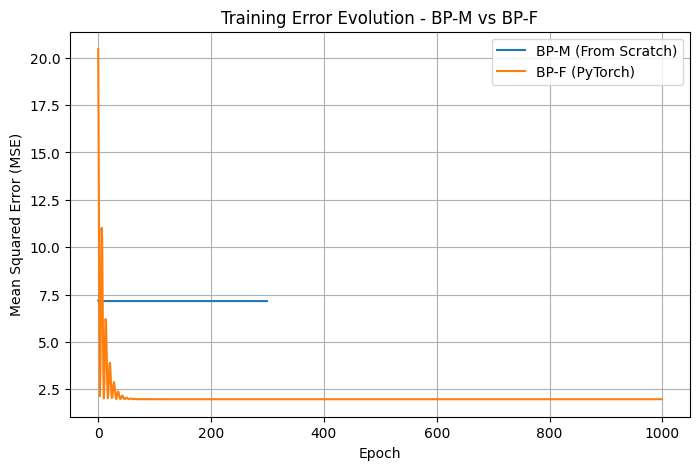

In [11]:

# Ccomparison between BP from Scratch and BP Pytorch


plt.figure(figsize=(8, 5))
plt.plot(train_err_manual, label="BP-M (From Scratch)", color="tab:blue")
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training Error Evolution - BP-M vs BP-F")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()